In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import os
import seaborn as sns
%matplotlib inline
#os. getcwd()

In [2]:
seattle_listing = pd.read_csv("F:\\2020Study\\DS_NanoDegree\\Project1\\seattle\\listings.csv")
seattle_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
#seattle_listing.isnull().sum()
seattle_listing.shape

(3818, 92)

In [4]:
#Remove the '$' and ',' in the price column
seattle_listing['price'] = seattle_listing['price'].str.replace(',', '').str.replace('$', '').astype(float)

seattle_listing['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [5]:
#count the number of neighbourhoods in seattle listing file.
seattle_listing.groupby('neighbourhood').ngroups

81

## 1. which neighbourhoods/areas are more popular?

In [6]:
#get the top 15 popular neighbourhoods by the number of listings in different neighbourhood
seattle_listing.groupby('neighbourhood')['price'].agg(['mean', 'count']).sort_values(by='count', ascending=False).head(15)

,mean,count
neighbourhood,,
Capitol Hill,126.433048,351
Ballard,123.615023,213
Belltown,166.627451,204
Minor,130.296875,192
Queen Anne,168.764706,187
Fremont,130.635135,148
Wallingford,131.335664,143
University District,95.420561,107
First Hill,136.085714,105


In [19]:
seattle_calendar = pd.read_csv("F:\\2020Study\\DS_NanoDegree\\Project1\\seattle\\calendar.csv")

In [20]:
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [21]:
seattle_calendar['price'] = seattle_calendar['price'].str.replace(',', '').str.replace('$', '').astype(float)

In [27]:
seattle_calendar['listing_id'] = seattle_calendar['listing_id'].astype(str)

In [23]:
seattle_calendar = seattle_calendar.dropna()

In [28]:
seattle_calendar.describe()

,price
count,934542.000000
mean,137.944859
std,105.062870
min,10.000000
25%,75.000000
50%,109.000000
75%,160.000000
max,1650.000000


## 2. What time is most popular time in a year?

In [66]:
seattle_calendar['month']=seattle_calendar['date'].apply(lambda x:x[:-3])

In [67]:
seattle_month_price = seattle_calendar.groupby('month')['price'].mean().reset_index(name='Mean Price(Month)')

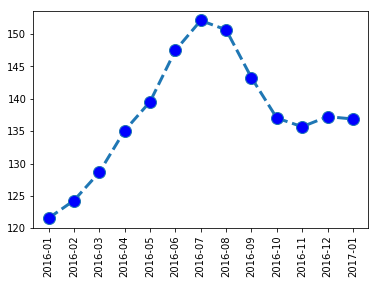

In [68]:
plt.plot(seattle_month_price['month'], seattle_month_price['Mean Price(Month)'],linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12);
plt.xticks(rotation=90);

The plot shows that average price in July and Augest are highest, implying that July and Augest are most popluar time in a year.

In [74]:
seattle_calendar['date'] = pd.to_datetime(seattle_calendar['date'])
seattle_calendar['weekday'] = seattle_calendar['date'].dt.weekday_name

In [75]:
#get the average price acrossing different dates and highest average price
seattle_calendar.groupby('weekday')['price'].mean().reset_index(name='Mean Price').sort_values(by='Mean Price', ascending=False)

,weekday,Mean Price
2,Saturday,143.202136
0,Friday,143.036294
4,Thursday,136.476032
3,Sunday,136.459941
1,Monday,135.676414
6,Wednesday,135.447880
5,Tuesday,135.408764


The result above shows that on Saturday and Friday, AirBnb price is higher than other weekdays. 

## 3. What factors affect listing price?

In [76]:
seattle_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [93]:
seattle_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [140]:
df = seattle_listing[['price', 'property_type','room_type', 'accommodates', 'bathrooms', 'bedrooms','security_deposit', 
                      'cleaning_fee', 'guests_included', 'review_scores_rating']].dropna()
y = df['price']
X = df.drop(columns = ['price'])
X['security_deposit'] = X['security_deposit'].str.replace(',', '').str.replace('$', '').astype(float)
X['cleaning_fee'] = X['cleaning_fee'].str.replace(',', '').str.replace('$', '').astype(float)



In [141]:
cat_cols = X.select_dtypes(include=['object']).copy().columns
for col in cat_cols:

    # for each cat add dummy var, drop original column
    X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression() 
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
r2_score(y_test, y_test_preds)

0.6725227468472859

In [149]:
coefficients = pd.DataFrame({"Feature":X.columns,"Coefficients":np.transpose(lm_model.coef_)})

In [150]:
coefficients

,Coefficients,Feature
0,4.361277e+00,accommodates
1,4.325251e+01,bathrooms
2,2.388080e+01,bedrooms
3,3.443504e-02,security_deposit
4,3.432912e-01,cleaning_fee
5,3.296738e+00,guests_included
6,7.662608e-01,review_scores_rating
7,-4.697098e+01,property_type_Bed & Breakfast
8,2.882551e+02,property_type_Boat
9,4.489059e+01,property_type_Bungalow
